In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
data = pd.read_csv("project1.csv")

#### Identify shape, size of the raw data (1 point)


In [5]:
data.shape

(131165, 12)

In [6]:
data.size

1573980

Shape is 131165 rows, 12 columns. Size is 1573980 entrees

#### Get information about datatypes. Comment if any of the variables need datatype conversion. Check for duplicate rows and treat them. (1 point)

In [7]:
data.head()

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A680855,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
1,A680857,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
2,A680858,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
3,A680859,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
4,A680860,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131165 entries, 0 to 131164
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         131165 non-null  object
 1   Date of Birth     131165 non-null  object
 2   Name              93658 non-null   object
 3   DateTime          131165 non-null  object
 4   MonthYear         131165 non-null  object
 5   Outcome Type      131125 non-null  object
 6   Outcome Subtype   65810 non-null   object
 7   Animal Type       131165 non-null  object
 8   Sex upon Outcome  131165 non-null  object
 9   Age upon Outcome  131165 non-null  object
 10  Breed             131165 non-null  object
 11  Color             131165 non-null  object
dtypes: object(12)
memory usage: 12.0+ MB


In [9]:
data.duplicated().sum()

17

All of the values that are strings need to be converted into numerical values to get them ready for ML. We can drop 17 duplicated rows. MonthYear and DateTime need to be converted to datetime. Date of Birth can be removed since we already have age at outcome. Animal ID and Name are assumed to be irrelevant. All other variables can be one-hotencoded into numerical values, and age upon outcome can be converted to just days.

#### Drop duplicate rows and irrelevant columns. (1 point)

In [10]:
data.drop_duplicates(inplace = True, ignore_index = True)
data.duplicated().sum()

0

In [11]:
data.drop(["Animal ID"], axis = 1, inplace = True)
data.drop(["Name"], axis = 1, inplace = True)
data.drop(["Date of Birth"], axis = 1, inplace = True)

#### Identify missing data and/or invalid values and treat them with suitable mean, median, mode or other method (1 point)

In [12]:
data.isna().sum()

DateTime                0
MonthYear               0
Outcome Type           40
Outcome Subtype     65346
Animal Type             0
Sex upon Outcome        0
Age upon Outcome        0
Breed                   0
Color                   0
dtype: int64

These are all of the values we need to treat after dropping duplicates and irrelavant columns

In [13]:
data.head() # preview of updated data

,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
1,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
2,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
3,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
4,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black


In [14]:
mode_cols = ["Outcome Type", "Outcome Subtype"]
for col in mode_cols:
    if data[col].isna().any() and col in data.columns:
        mode = data[col].mode().iloc[0]
        data[col] = data[col].fillna(mode)
data.isna().sum()
data.tail()

,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
131143,2014-02-04T10:14:00,Feb-14,Transfer,SCRP,Cat,Intact Male,2 years,Domestic Shorthair Mix,Brown Tabby
131144,2014-02-08T10:14:00,Feb-14,Transfer,Partner,Dog,Intact Male,5 years,Pekingese,Red/White
131145,2014-02-07T10:14:00,Feb-14,Transfer,SCRP,Cat,Spayed Female,7 months,Domestic Medium Hair Mix,Brown Tabby
131146,2014-03-27T08:00:00,Mar-14,Transfer,Partner,Dog,Intact Male,1 month,Pomeranian Mix,White/Brown
131147,2014-05-14T08:00:00,May-14,Transfer,Partner,Dog,Intact Male,3 years,Pekingese/Lhasa Apso,Buff


So now we treated all of the missing/invalid values and replaced them with the mode of the column

#### Convert all data to numeric and/or categorical data types (1 point)

First let's convert DateTime and MonthYear to dateTime. We want to extract the year, month, day, and time using the DateTime and MonthYear columns. We can then drop DateTime and MonthYear. We will onehotencode later.

In [15]:
# NOTE: not AI generated, stackOverflow
data["DateTime"] = pd.to_datetime(data["DateTime"], format="mixed", errors="coerce", utc=True).dt.tz_convert(None)   
data["Admission Year"] = data["DateTime"].dt.year
data["Admission Month"] = data["DateTime"].dt.month
data["Admission Day"] = data["DateTime"].dt.day
data.drop(["DateTime"], axis = 1, inplace = True)
data.drop(["MonthYear"], axis = 1, inplace = True)
data.tail()

,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Admission Year,Admission Month,Admission Day
131143,Transfer,SCRP,Cat,Intact Male,2 years,Domestic Shorthair Mix,Brown Tabby,2014,2,4
131144,Transfer,Partner,Dog,Intact Male,5 years,Pekingese,Red/White,2014,2,8
131145,Transfer,SCRP,Cat,Spayed Female,7 months,Domestic Medium Hair Mix,Brown Tabby,2014,2,7
131146,Transfer,Partner,Dog,Intact Male,1 month,Pomeranian Mix,White/Brown,2014,3,27
131147,Transfer,Partner,Dog,Intact Male,3 years,Pekingese/Lhasa Apso,Buff,2014,5,14


Now let's convert Age upon Outcome to days, and rename the column to just Age for clarity. Also let's check if the longer dates are correct by looking at the tail (last 5 values).

In [16]:
data["Age"] = 0

for i, col in enumerate(data["Age upon Outcome"]):
    days = 0
    number, category = col.split()
    number = int(number)
    if "day" in category:
        days += number
    elif "week" in category:
        days += number * 7
    elif "month" in category:
        days += number * 30
    else:  # assume years
        days += number * 365
    data.at[i, "Age"] = days

data = data.drop(columns=["Age upon Outcome"])
data.tail()

,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Breed,Color,Admission Year,Admission Month,Admission Day,Age
131143,Transfer,SCRP,Cat,Intact Male,Domestic Shorthair Mix,Brown Tabby,2014,2,4,730
131144,Transfer,Partner,Dog,Intact Male,Pekingese,Red/White,2014,2,8,1825
131145,Transfer,SCRP,Cat,Spayed Female,Domestic Medium Hair Mix,Brown Tabby,2014,2,7,210
131146,Transfer,Partner,Dog,Intact Male,Pomeranian Mix,White/Brown,2014,3,27,30
131147,Transfer,Partner,Dog,Intact Male,Pekingese/Lhasa Apso,Buff,2014,5,14,1095


#### Visualize the dataset through different univariate analysis and comment on your observations (2)

Before we onehotencode, let's visualize the data. Let's also drop the Breed column as stated in part 2.

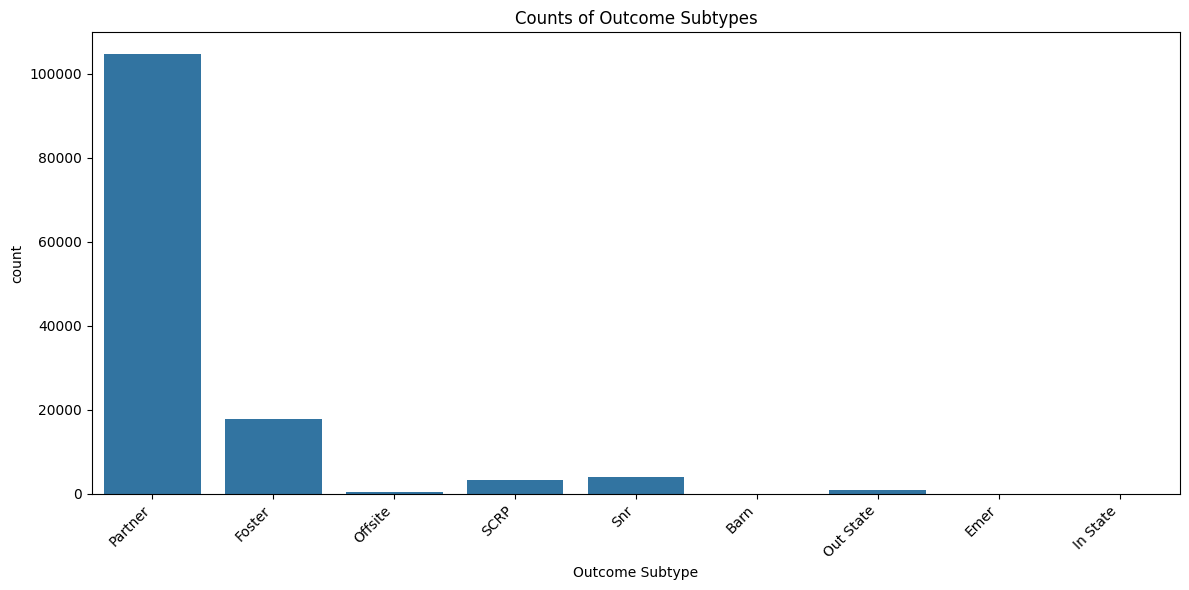

In [17]:
data.drop(["Breed"], axis = 1, inplace = True)

plt.figure(figsize=(12,6))
sns.countplot(x="Outcome Subtype", data=data)
plt.xticks(rotation=45, ha='right')
plt.title("Counts of Outcome Subtypes")
plt.tight_layout()
plt.show()

We can see that a vast majority of animals were able to find a parter, with foster being the second highest.

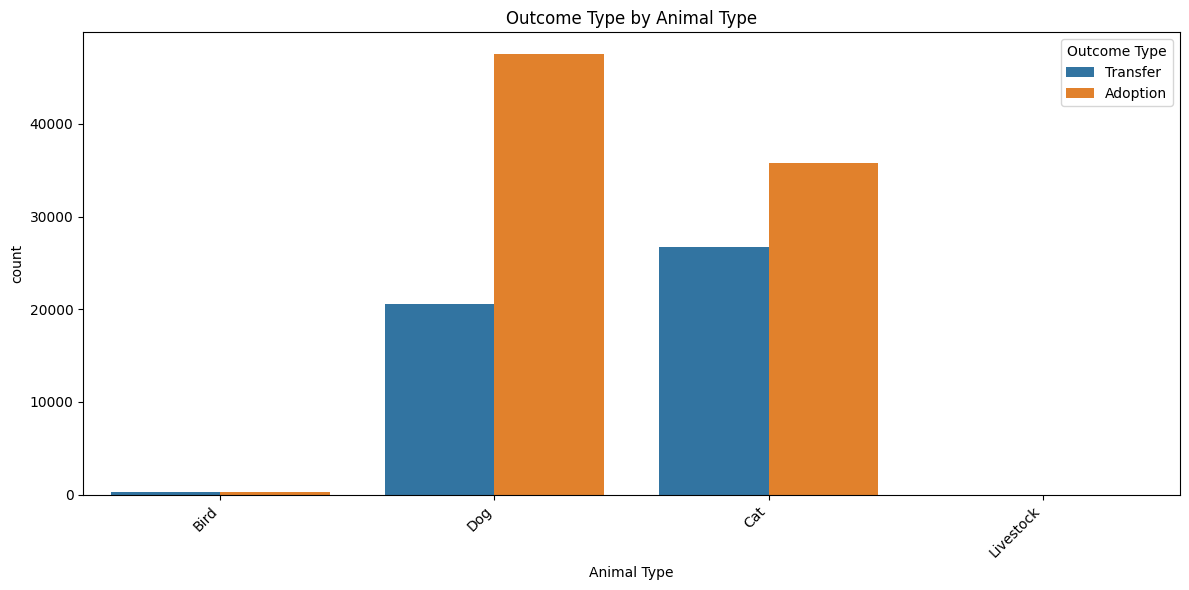

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x="Animal Type", hue="Outcome Type", data=data)
plt.title("Outcome Type by Animal Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This graph shows us that the most popular animals by far are dogs and cats. Dogs are more popular, and the number of adptions is almost double the amoutn of transfers.

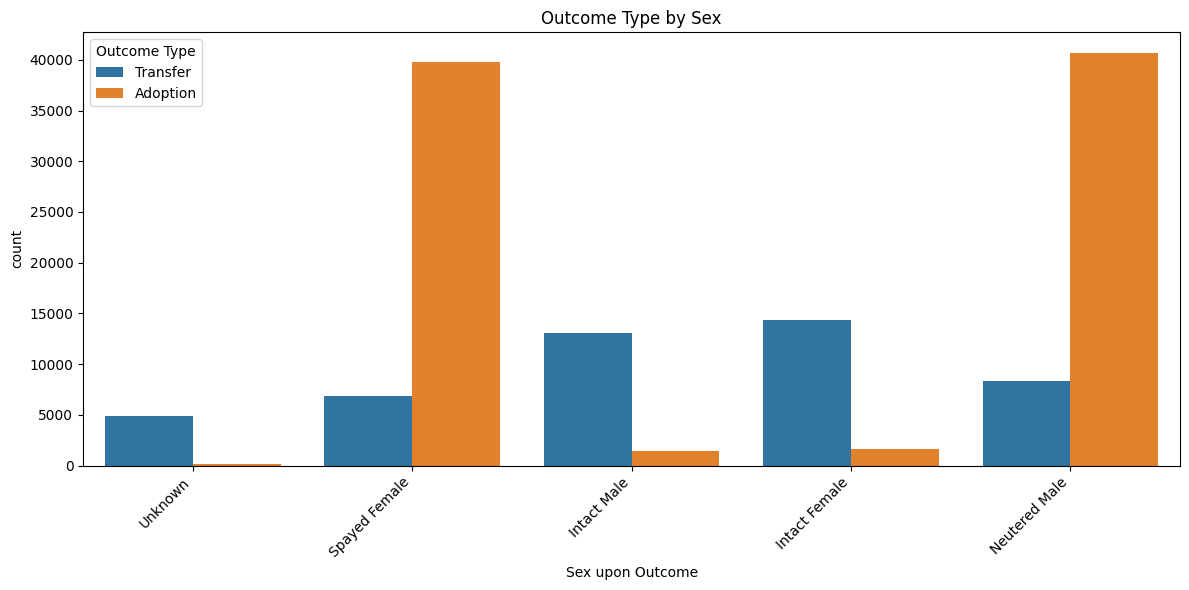

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x="Sex upon Outcome", hue="Outcome Type", data=data)
plt.title("Outcome Type by Sex")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This chart shows that spayed females and neutered males are by far the two most popular choices. It's also interesting that in all the other categories, transfers are by far the most popular!

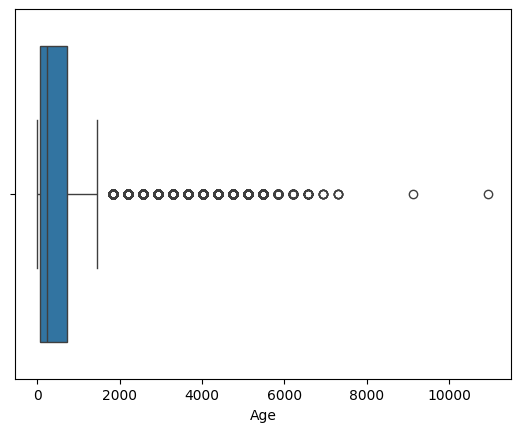

In [20]:
sns.boxplot(x=data['Age']); plt.show()

Unlike the other graphs that are bivariate, this univariate graph shows that the majority of animals adopted were in the age between 0-1000 days. Almost all of the outomes were between age of 0-2000 days, with some outliers being older.

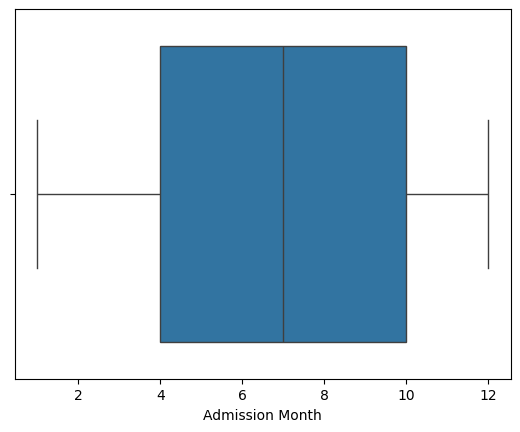

In [21]:
sns.boxplot(x=data['Admission Month']); plt.show()

Here, we can see that the most popular months for the animal shelter are during the middle of the year, but this graph shows the data is relatively not skewed.

### Perform one-hot encoding on categorical variables (1 point)

In [22]:
data = pd.get_dummies(data, columns=["Outcome Subtype"], drop_first=True)
data['Outcome Type'] = data['Outcome Type'].apply(lambda x: 1 if x == "Adoption" else 0)
categories = ["Animal Type", "Sex upon Outcome", "Color"]
for col in categories:
    data = pd.get_dummies(data, columns=[col], drop_first=True)

data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131148 entries, 0 to 131147
Columns: 618 entries, Outcome Type to Color_Yellow/Yellow
dtypes: bool(613), int32(3), int64(2)
memory usage: 80.2 MB


Outcome Type                 0
Admission Year               0
Admission Month              0
Admission Day                0
Age                          0
                            ..
Color_Yellow/Orange Tabby    0
Color_Yellow/Red             0
Color_Yellow/Tan             0
Color_Yellow/White           0
Color_Yellow/Yellow          0
Length: 618, dtype: int64

In [23]:
for col in data.columns:
    print(col)
data.tail()

Outcome Type
Admission Year
Admission Month
Admission Day
Age
Outcome Subtype_Emer
Outcome Subtype_Foster
Outcome Subtype_In State
Outcome Subtype_Offsite
Outcome Subtype_Out State
Outcome Subtype_Partner
Outcome Subtype_SCRP
Outcome Subtype_Snr
Animal Type_Cat
Animal Type_Dog
Animal Type_Livestock
Sex upon Outcome_Intact Male
Sex upon Outcome_Neutered Male
Sex upon Outcome_Spayed Female
Sex upon Outcome_Unknown
Color_Agouti/Brown Tabby
Color_Agouti/Cream
Color_Agouti/Gold
Color_Agouti/White
Color_Apricot
Color_Apricot/Brown
Color_Apricot/White
Color_Black
Color_Black Brindle
Color_Black Brindle/Black
Color_Black Brindle/Blue Tick
Color_Black Brindle/Brown
Color_Black Brindle/Brown Brindle
Color_Black Brindle/Tan
Color_Black Brindle/White
Color_Black Brindle/Yellow
Color_Black Smoke
Color_Black Smoke/Black
Color_Black Smoke/Black Tabby
Color_Black Smoke/Blue Tick
Color_Black Smoke/Brown Tabby
Color_Black Smoke/White
Color_Black Tabby
Color_Black Tabby/Black Smoke
Color_Black Tabby/Brow

,Outcome Type,Admission Year,Admission Month,Admission Day,Age,Outcome Subtype_Emer,Outcome Subtype_Foster,Outcome Subtype_In State,Outcome Subtype_Offsite,Outcome Subtype_Out State,...,Color_Yellow/Brown,Color_Yellow/Cream,Color_Yellow/Gray,Color_Yellow/Green,Color_Yellow/Orange,Color_Yellow/Orange Tabby,Color_Yellow/Red,Color_Yellow/Tan,Color_Yellow/White,Color_Yellow/Yellow
131143,0,2014,2,4,730,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
131144,0,2014,2,8,1825,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
131145,0,2014,2,7,210,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
131146,0,2014,3,27,30,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
131147,0,2014,5,14,1095,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Now we can see that all of our variables are present (onehotencoded) and ready for ML. We converted the outcome type to 0 or 1 depending on whether it was a transfer or adoption. All of the other string variables are now boolean, as we checked with the commands above.

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score
import numpy as np

In [25]:
X = data.drop(["Outcome Type"], axis = 1)
Y = data["Outcome Type"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=1)

clf = SGDClassifier(loss="perceptron", alpha=0.001)
clf.fit(X_train, Y_train)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

accuracy_train=accuracy_score(Y_train, clf.predict(X_train))
accuracy_test=accuracy_score(Y_test, clf.predict(X_test))
recall_test = recall_score(Y_test, clf.predict(X_test))
recall_train = recall_score(Y_train, clf.predict(X_train))
precision_test = precision_score(Y_test, clf.predict(X_test))
precision_train = precision_score(Y_train, clf.predict(X_train))
f1_test = f1_score(Y_test, clf.predict(X_test))
f1_train = f1_score(Y_train, clf.predict(X_train))
print(f"Train accuracy score for CLF: {accuracy_train} Test accuracy score for CLF: {accuracy_test}")
print(f"Train recall score for CLF: {recall_train} Test recall score for CLF: {recall_test}")
print(f"Train precision score for CLF: {precision_train} Test precision score for CLF: {precision_test}")
print(f"Train f1 score for CLF: {f1_train} Test f1 score for CLF: {f1_test}")

Train accuracy score for CLF: 0.7341372286308726 Test accuracy score for CLF: 0.7326216800101665
Train recall score for CLF: 0.9647213585266683 Test recall score for CLF: 0.9657179303197002
Train precision score for CLF: 0.7165116544644783 Test precision score for CLF: 0.7149265183261524
Train f1 score for CLF: 0.8222942225781791 Test f1 score for CLF: 0.8216102557145765


In [26]:
accuracy_trainKNN=accuracy_score(Y_train, knn.predict(X_train))
accuracy_testKNN=accuracy_score(Y_test, knn.predict(X_test))
recall_testKNN = recall_score(Y_test, knn.predict(X_test))
recall_trainKNN = recall_score(Y_train, knn.predict(X_train))
precision_testKNN = precision_score(Y_test, knn.predict(X_test))
precision_trainKNN = precision_score(Y_train, knn.predict(X_train))
f1_testKNN = f1_score(Y_test, knn.predict(X_test))
f1_trainKNN = f1_score(Y_train, knn.predict(X_train))
print(f"Train accuracy score for KNN: {accuracy_trainKNN} Test accuracy score for KNN: {accuracy_testKNN}")
print(f"Train recall score for KNN: {recall_trainKNN} Test recall score for KNN: {recall_testKNN}")
print(f"Train precision score for KNN: {precision_trainKNN} Test precision score for KNN: {precision_testKNN}")
print(f"Train f1 score for KNN: {f1_trainKNN} Test f1 score for KNN: {f1_testKNN}")

Train accuracy score for KNN: 0.8729126499134016 Test accuracy score for KNN: 0.8060998856271445
Train recall score for KNN: 0.9472614207127481 Test recall score for KNN: 0.9040899306386032
Train precision score for KNN: 0.8659940337670046 Test precision score for KNN: 0.8128158262552414
Train f1 score for KNN: 0.9048065861081419 Test f1 score for KNN: 0.856026722527317


In [27]:
param_grid = {"n_neighbors": np.arange(1, 51, 2)}
knn_grid = KNeighborsClassifier()
knn_gscv = GridSearchCV(knn_grid, param_grid, cv=3, n_jobs=-1, verbose=1)
knn_gscv.fit(X_train, Y_train)
best_knn = knn_gscv.best_estimator_

y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

accuracy_traininggscv = accuracy_score(Y_train, y_train_pred)
accuracy_testggscv = accuracy_score(Y_test, y_test_pred)
recall_traininggscv = recall_score(Y_train, y_train_pred)
recall_testggscv = recall_score(Y_test, y_test_pred)
precision_traininggscv = precision_score(Y_train, y_train_pred)
precision_testggscv = precision_score(Y_test, y_test_pred)
f1_traininggscv = f1_score(Y_train, y_train_pred)
f1_testggscv = f1_score(Y_test, y_test_pred)

print(f"Train accuracy score for gscv: {accuracy_traininggscv} Test accuracy score for gscv: {accuracy_testggscv}")
print(f"Train recall score for gscv: {recall_traininggscv} Test recall score for gscv: {recall_testggscv}")
print(f"Train precision score for gscv: {precision_traininggscv} Test precision score for gscv: {precision_testggscv}")
print(f"Train f1 score for gscv: {f1_traininggscv} Test f1 score for gscv: {f1_testggscv}")

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Train accuracy score for gscv: 0.9004607692559067 Test accuracy score for gscv: 0.8040920066082095
Train recall score for gscv: 0.9506782382888578 Test recall score for gscv: 0.8849158893406681
Train precision score for gscv: 0.8990112766163688 Test precision score for gscv: 0.8215766099185788
Train f1 score for gscv: 0.92412315663611 Test f1 score for gscv: 0.8520707787970675


Recall is the most important metric for the classification models because the shelter’s priority is to capture adoption trends accurately. A higher recall ensures they identify as many true adoptions as possible, which provides better insight into program success rates and supports future planning and decision-making.